# Aperture photometry with custom aperture

First, let’s load a target pixel file. Let’s choose **KIC 6679295**. This is a Kepler planet canidate. We’ll use the search_targetpixelfile function to download every target pixel file available for each quarter of this data set:

In [1]:
%matplotlib inline
from lightkurve import search_targetpixelfile
import matplotlib.pyplot as plt

kic = 6679295
tpfs = search_targetpixelfile(kic).download_all()

We’ve now created a list of KeplerTargetPixelFile objects, where each item is a different quarter. We’re going to be able to combine these just like in the `stitching tutorial <>`__.

Let's take a look at one of those tpfs:

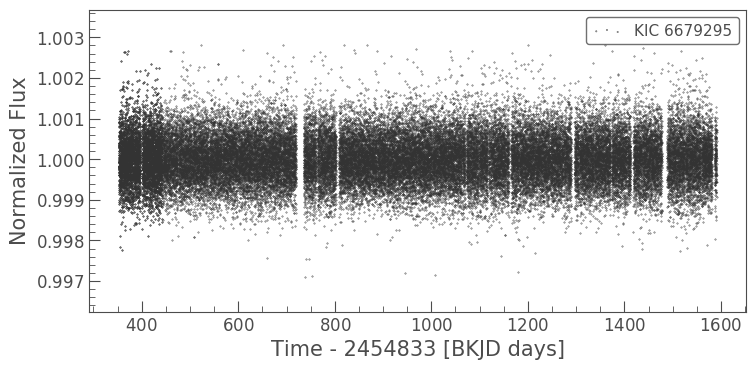

In [2]:
pipeline_lc = tpfs[0].to_lightcurve().flatten()
for tpf in tpfs:
    pipeline_lc = pipeline_lc.append(tpf.to_lightcurve().flatten())
    
pipeline_lc = pipeline_lc.remove_nans().remove_outliers()

pipeline_lc.scatter(s=0.1)

Above we have created the light curve from the target pixel files, stitched them all together in the same way as in the [stitching tutorial] using lightkurves append function. To recap the steps we:
-  Convert to a KeplerLightCurve object with to_lightcurve()
-  Remove NaNs with remove_nans()
-  Remove long term trends with flatten()
-  Remove outliers with simple sigma clipping using remove_outliers()

The period for this planet candidate is 24.57537 days. Let’s plot it up and take a look.

(0.998, 1.0015)

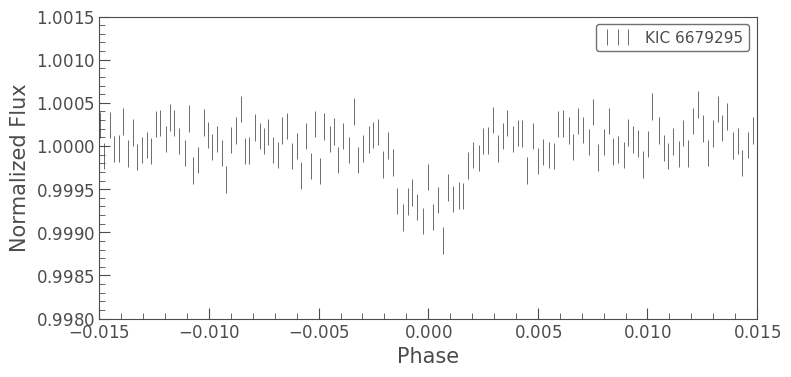

In [3]:
pipeline_lc.fold(period=24.57537,t0=21.3).bin().errorbar() # ??? Period and t0 ???
plt.xlim(-0.015, 0.015)
plt.ylim(0.998, 1.0015)

Looks like a great candidate. However, we might just want to check on the pixels. Let’s plot one of the target pixel files:

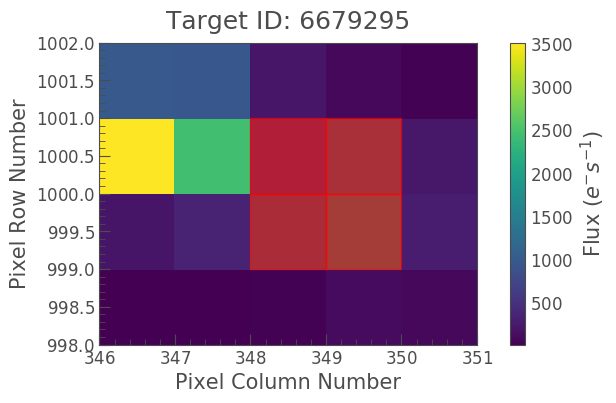

In [4]:
tpf.plot(frame=100, aperture_mask=tpf.pipeline_mask, mask_color='red')

The Kepler Pipeline aperture is in red. It looks like there is a nearby contaminate star! We might want to check that the signal is not really coming from the bright, nearby contaminant, rather than our target star. Let’s use the top right corner four pixels as our new mask:

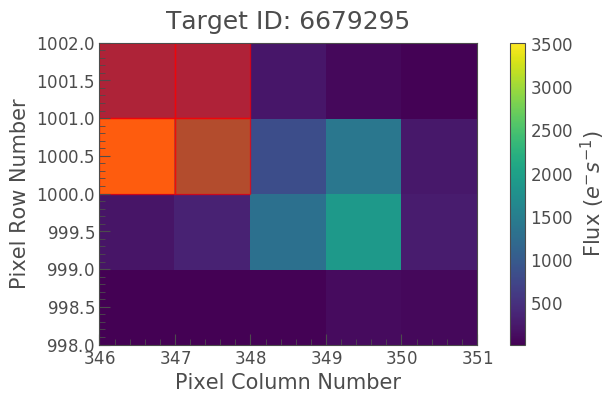

In [5]:
import numpy as np

aperture_mask = np.zeros(tpf.shape[1:], dtype=np.int)
aperture_mask[-2:,0:2] = 1
tpf.plot(frame=100, aperture_mask=aperture_mask, mask_color='red')

(0.998, 1.0015)

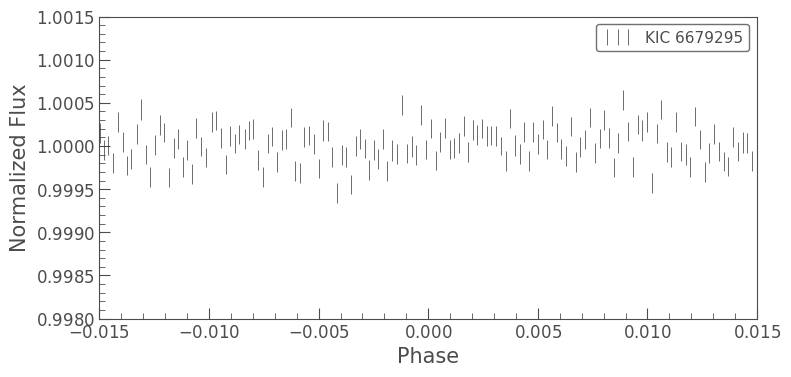

In [6]:
aper = np.zeros(tpfs[0].shape[1:])
aper[-2:, 0:2] = 1
user_lc = tpfs[0].to_lightcurve(aperture_mask=aper.astype(bool)).flatten()

for tpf in tpfs:
    aper = np.zeros(tpf.shape[1:])
    aper[-2:, 0:2] = 1
    user_lc = user_lc.append(tpf.to_lightcurve(aperture_mask=aper.astype(bool)).flatten())
    
user_lc = user_lc.remove_nans().remove_outliers()

user_lc.fold(period=24.57537,t0=-0.133).bin().errorbar() # ??? t0 ???
plt.xlim(-0.015,0.015)
plt.ylim(0.998,1.0015)

So this confirms that the oscillation comes from the target and not the contaminant. **This is one of the checks to validate an exoplanet!**